# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares 

# Etapa 1: Importação das bibliotecas

In [15]:

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

tf.__version__

'2.8.0'

# Etapa 2: Importação da base de dados

In [4]:
# Leitura do arquivo csv
df = pd.read_csv("SalesData.csv")

In [6]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
# Visualização dos 10 últimos registros
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
# Visualização de informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
# Descrição da base de dados
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da base de dados

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

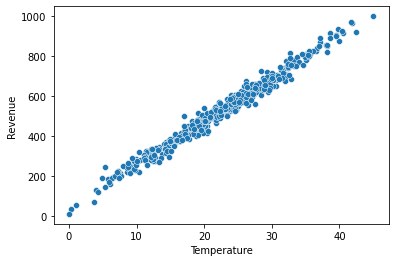

In [10]:
# Scatter plot do Seborn
sns.scatterplot(x = df['Temperature'], y = df['Revenue'])

# Etapa 4: Criação das variáveis da base de dados

In [17]:
x = df['Temperature']
y = df['Revenue']

In [25]:
# Criação das variáveis X_train e y_train
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [26]:
# Verificação da variavel x_train e y_train
len(X_train) == len(y_train)

True

# Etapa 5: Criação e construção do modelo

In [74]:
# Construção do modelo sequencial
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [75]:
# Sumário do modelo
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [77]:
# Treinamento
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 272697.5000
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 240835.8594
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 211596.7656
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 185000.5156
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 160625.9844
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 139297.8750
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 119759.1172
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 102624.7422
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 87668.7891
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 74298.4609
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 62867.1016
Epoch 12/100
13/13 [==============================] - 0s 2ms/step 

Epoch 99/100
13/13 [==============================] - 0s 1ms/step - loss: 681.6718
Epoch 100/100
13/13 [==============================] - 0s 1ms/step - loss: 681.6379


# Etapa 6: Avaliação do modelo 

In [78]:
# Visualização do dicionário com os resultados
epochs_hist.history.keys()

dict_keys(['loss'])

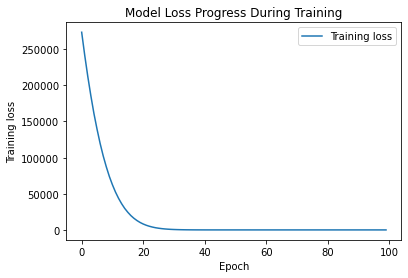

In [80]:
# Gráfico com os resultados da loss function
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [34]:
# Visualização dos pesos
model.get_weights()

[array([[22.196814]], dtype=float32), array([26.72649], dtype=float32)]

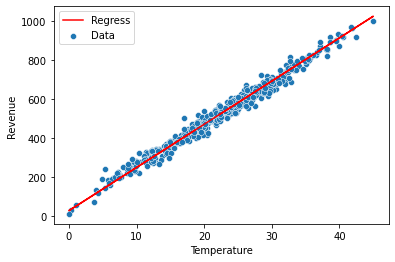

In [41]:
sns.scatterplot(x=df['Temperature'], y=df['Revenue'])

y_pred = model.predict(X_train)
x_new = np.linspace(-50,60,30)

plt.plot(X_train,y_pred.ravel(),color = 'red')
plt.legend(labels=["Regress","Data"]); 

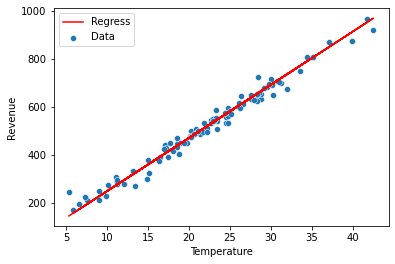

In [43]:
sns.scatterplot(x=X_test, y=y_test)

y_pred = model.predict(X_test)
x_new = np.linspace(-50,60,30)

plt.plot(X_test,y_pred.ravel(),color = 'red')
plt.legend(labels=["Regress","Data"]);

# Etapa 7: Confirmar os resultados usando sklearn

In [ ]:
# Usar o sklearn para obter os mesmos resultados

In [92]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [87]:
regr = LinearRegression()
regr.fit(X_train,y_train)

In [97]:
print(regr.coef_)
print(regr.intercept_)

[[21.48142776]]
[44.43176016]


Text(0.5, 1.0, 'Revenue Vs temperature')

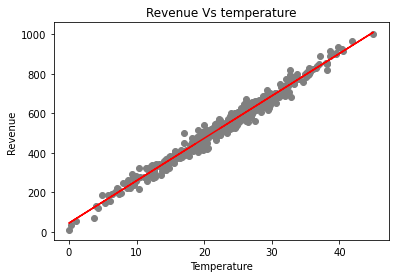

In [101]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regr.predict(X_train), color = 'red')
plt.ylabel("Revenue")
plt.xlabel("Temperature")
plt.title("Revenue Vs temperature")